# 데이터 탐색

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='AppleGothic'  #Mac용
#matplotlib.rcParam['font.family']='Malgun Gothic' 윈도우 용
matplotlib.rcParams['font.size']=15 #글자 크기
matplotlib.rcParams['axes.unicode_minus']=False #한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

train.shape, test.shape, submission.shape

((5497, 14), (1000, 13), (1000, 2))

In [5]:
display(train.head(2))
test.head(2)

index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   

   density    pH  sulphates  alcohol   type  
0  0.99432  3.44       0.44     10.2  white  
1  0.99690  3.19       0.59      9.5    red

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0            9.0              0.31         0.48             6.6   
1      1           13.3              0.43         0.58             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.043                 11.0                  73.0   0.9938  2.90   
1      0.070                 15.0                  40.0   1.0004  3.06   

   sulphates  alcohol   type  
0       0.38     11.6  white  
1       0.49      9.0    red

## 한글 칼럼명 변경...

In [6]:
train = train.rename(columns={"fixed acidity":"산도", "volatile acidity": "휘발성산", "citric acid":"시트르산", "residual sugar":"잔여당분",
                      "chlorides":"염화물", "free sulfur dioxide":"독립_이산화황","total sulfur dioxide":"총_이산화황", "density":"밀도",
                      "pH":"수소이온농도", "sulphates":"황산염", "alcohol":"도수", "type":"종류"})

test = test.rename(columns={"fixed acidity":"산도", "volatile acidity": "휘발성산", "citric acid":"시트르산", "residual sugar":"잔여당분",
                      "chlorides":"염화물", "free sulfur dioxide":"독립_이산화황","total sulfur dioxide":"총_이산화황", "density":"밀도",
                      "pH":"수소이온농도", "sulphates":"황산염", "alcohol":"도수", "type":"종류"})

In [7]:
quality = train[["quality"]]
train = train.drop(columns="quality")
train = pd.concat([train, quality], axis=1)
train.head()

index   산도   휘발성산  시트르산  잔여당분    염화물  독립_이산화황  총_이산화황       밀도  수소이온농도  \
0      0  5.6  0.695  0.06   6.8  0.042      9.0    84.0  0.99432    3.44   
1      1  8.8  0.610  0.14   2.4  0.067     10.0    42.0  0.99690    3.19   
2      2  7.9  0.210  0.39   2.0  0.057     21.0   138.0  0.99176    3.05   
3      3  7.0  0.210  0.31   6.0  0.046     29.0   108.0  0.99390    3.26   
4      4  7.8  0.400  0.26   9.5  0.059     32.0   178.0  0.99550    3.04   

    황산염    도수     종류  quality  
0  0.44  10.2  white        5  
1  0.59   9.5    red        5  
2  0.52  10.9  white        5  
3  0.50  10.8  white        6  
4  0.43  10.9  white        6

## 요약본 만들기

In [8]:
def resumtable(df):
    summary = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:"dtypes"})
    summary["결측치 갯수"] = df.isnull().sum().values
    summary["고윳값 갯수"] = df.nunique().values
    summary["첫번째 값"] = df.iloc[0].values
    summary["두번째 값"] = df.iloc[1].values
    summary["세번째 값"] = df.iloc[2].values
    
    return summary

In [9]:
resumtable(train)

index   dtypes  결측치 갯수  고윳값 갯수    첫번째 값   두번째 값    세번째 값
0     index    int64       0    5497        0       1        2
1        산도  float64       0     106      5.6     8.8      7.9
2      휘발성산  float64       0     179    0.695    0.61     0.21
3      시트르산  float64       0      89     0.06    0.14     0.39
4      잔여당분  float64       0     309      6.8     2.4      2.0
5       염화물  float64       0     205    0.042   0.067    0.057
6   독립_이산화황  float64       0     127      9.0    10.0     21.0
7    총_이산화황  float64       0     271     84.0    42.0    138.0
8        밀도  float64       0     970  0.99432  0.9969  0.99176
9    수소이온농도  float64       0     107     3.44    3.19     3.05
10      황산염  float64       0     106     0.44    0.59     0.52
11       도수  float64       0     103     10.2     9.5     10.9
12       종류   object       0       2    white     red    white
13  quality    int64       0       7        5       5        5

# 시각화

## "quaility"

- 6,5,7 등급 : 총 93~94%
- 4 등급 : 3.3%
- 8 등급 : 2.7%
- 3,9 등급 : 0.5%


<Axes: xlabel='quality'>

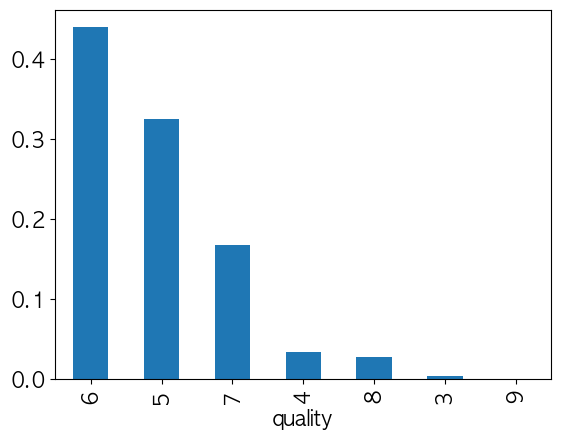

In [10]:
fig, ax = plt.subplots()
train["quality"].value_counts(normalize=True).plot.bar()

## "종류"

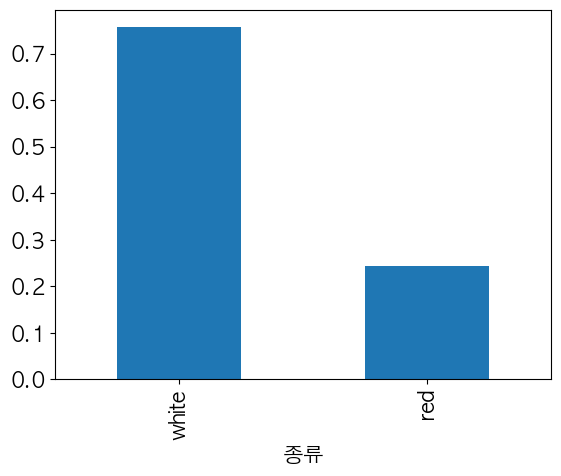

In [11]:
train["종류"].value_counts(normalize=True).plot.bar()
plt.show()

```
비율대비
5등급에 "red"와인이 많고
7,8 등급엔 "white"와인이 많다
```

<Axes: xlabel='quality', ylabel='count'>

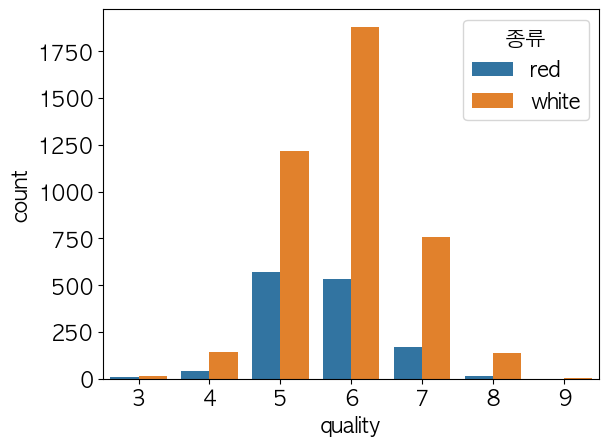

In [12]:
sns.countplot(data=train, x="quality", hue="종류")

In [13]:
train.groupby("quality")["종류"].value_counts(normalize=True).reset_index()

quality     종류  proportion
0         3  white    0.653846
1         3    red    0.346154
2         4  white    0.779570
3         4    red    0.220430
4         5  white    0.680649
5         5    red    0.319351
6         6  white    0.778560
7         6    red    0.221440
8         7  white    0.817100
9         7    red    0.182900
10        8  white    0.914474
11        8    red    0.085526
12        9  white    1.000000

## 품질, 종류 제외

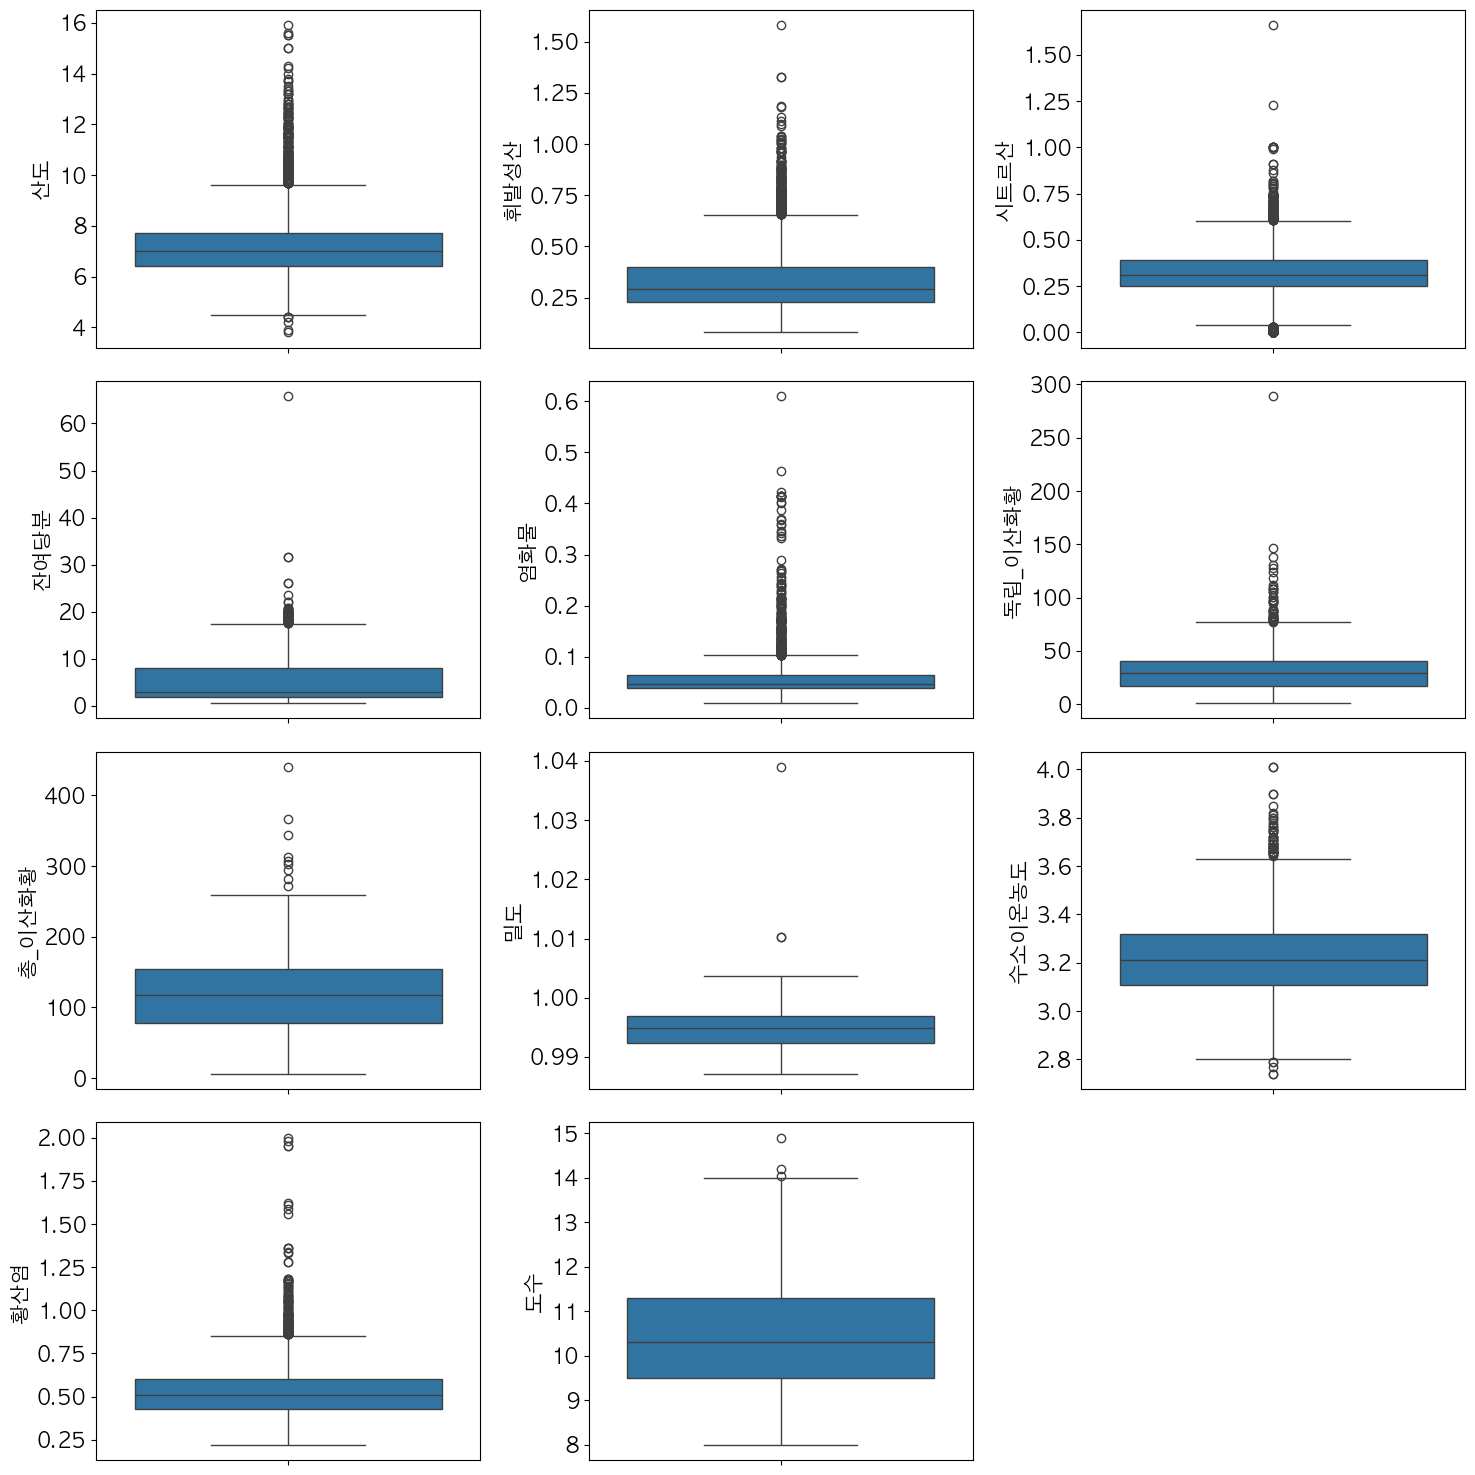

In [14]:
fig, ax = plt.subplots(4,3, figsize=(15,15))

sns.boxplot(data=train, y="산도", ax=ax[0,0])
sns.boxplot(data=train, y="휘발성산", ax=ax[0,1])
sns.boxplot(data=train, y="시트르산", ax=ax[0,2])
sns.boxplot(data=train, y="잔여당분", ax=ax[1,0])
sns.boxplot(data=train, y="염화물", ax=ax[1,1])
sns.boxplot(data=train, y="독립_이산화황", ax=ax[1,2])
sns.boxplot(data=train, y="총_이산화황", ax=ax[2,0])
sns.boxplot(data=train, y="밀도", ax=ax[2,1])
sns.boxplot(data=train, y="수소이온농도", ax=ax[2,2])
sns.boxplot(data=train, y="황산염", ax=ax[3,0])
sns.boxplot(data=train, y="도수", ax=ax[3,1])
ax[3,2].remove()

plt.tight_layout()
plt.show()

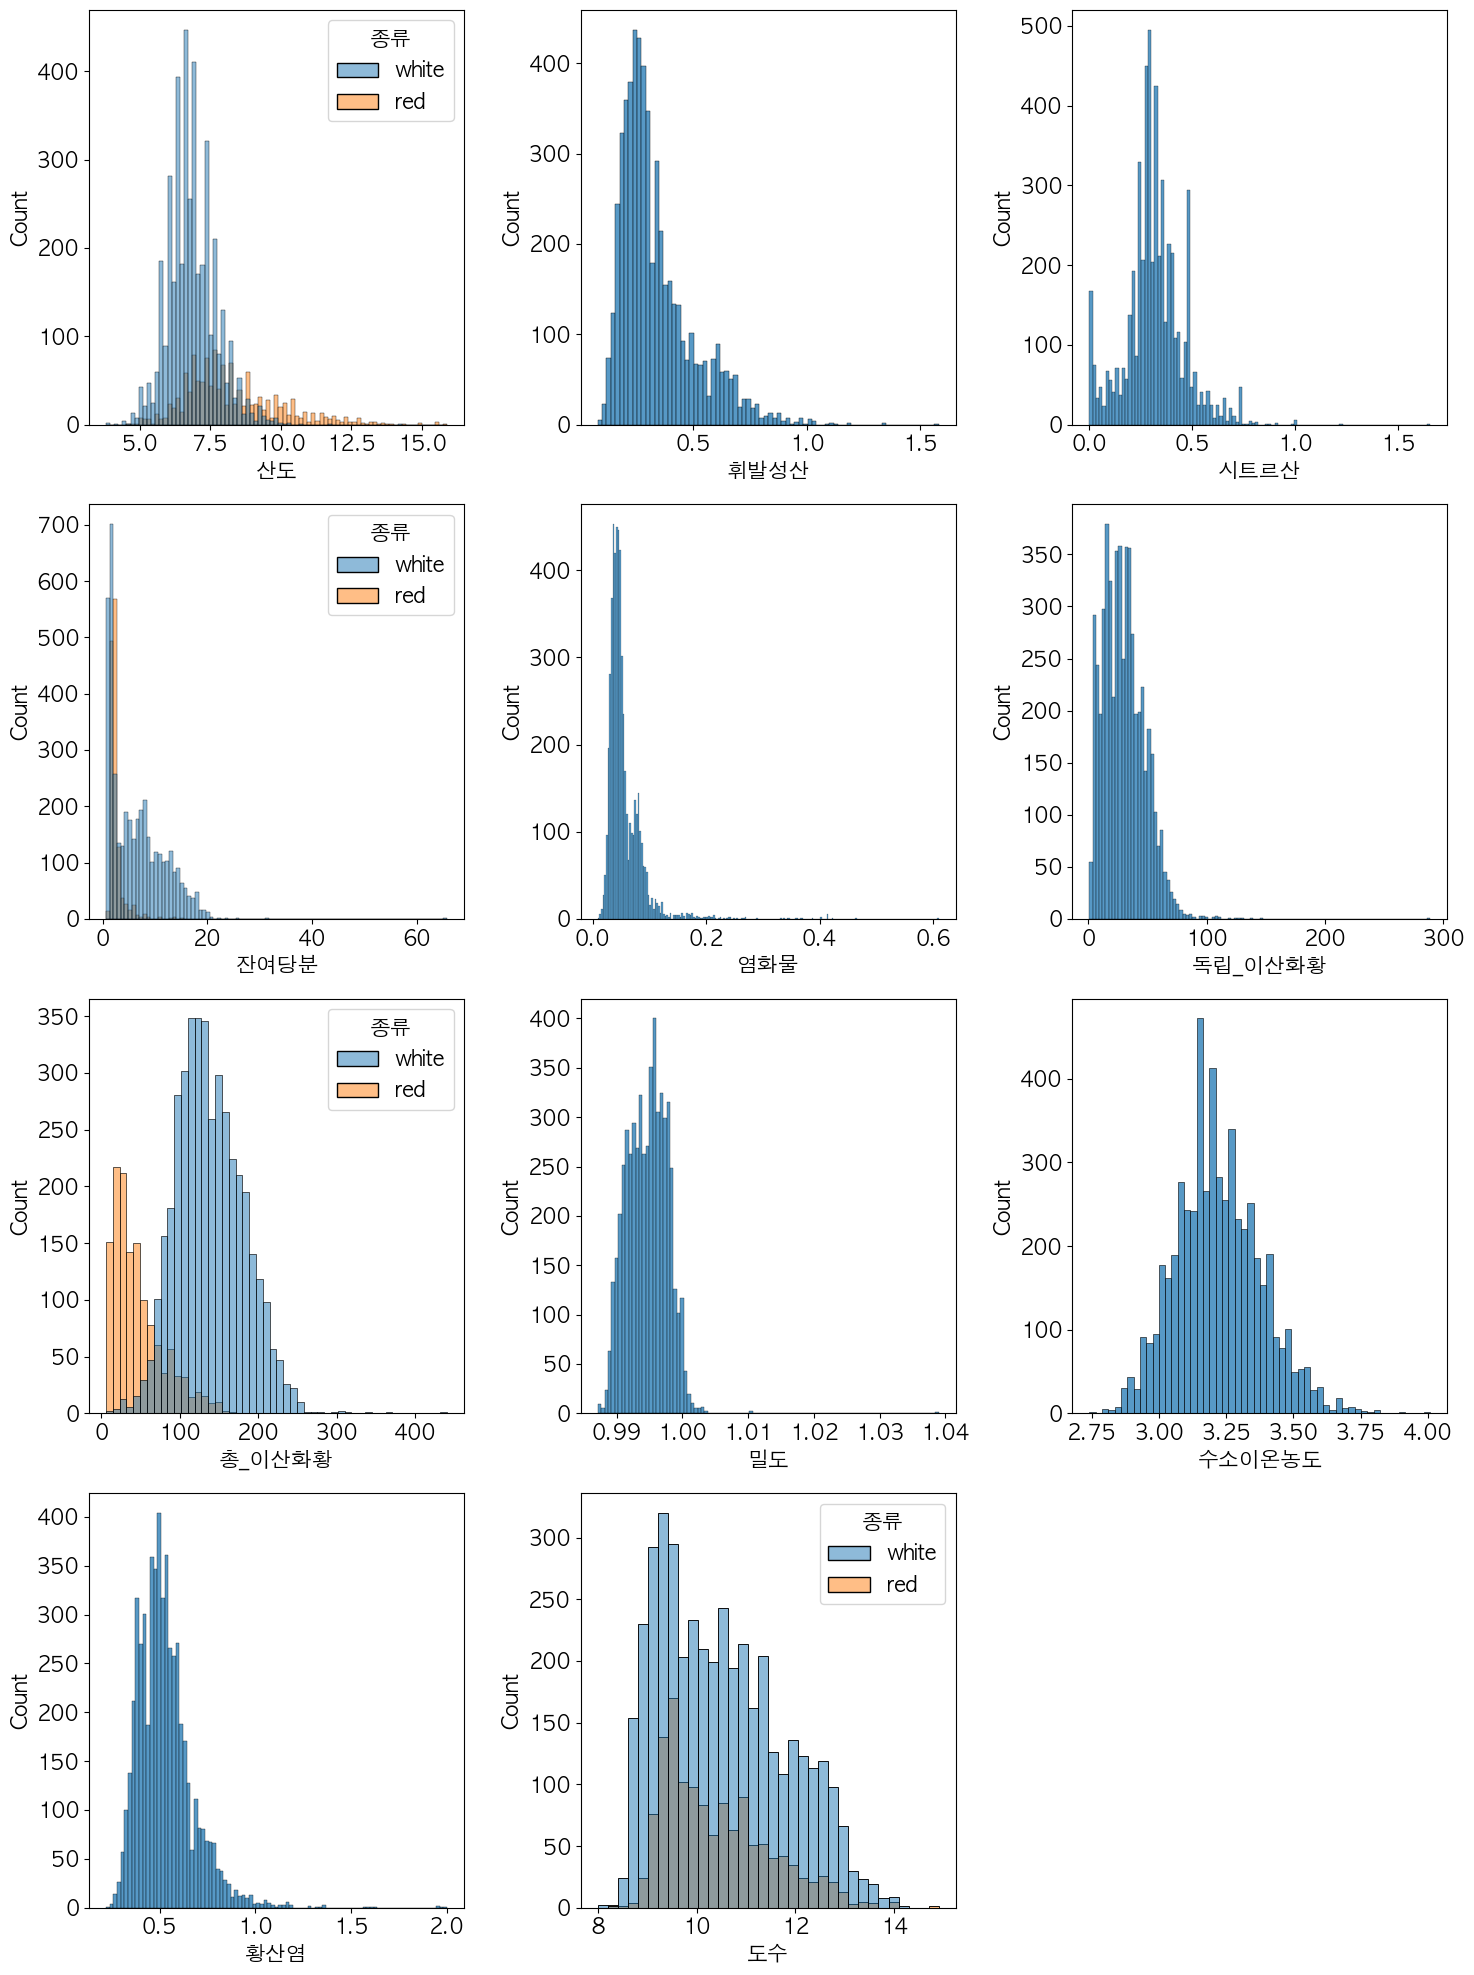

In [15]:
fig, ax = plt.subplots(4,3, figsize=(15,20))

sns.histplot(data=train, x="산도", ax=ax[0,0],hue="종류")
sns.histplot(data=train, x="휘발성산", ax=ax[0,1])
sns.histplot(data=train, x="시트르산", ax=ax[0,2])
sns.histplot(data=train, x="잔여당분", ax=ax[1,0], hue="종류")
sns.histplot(data=train, x="염화물", ax=ax[1,1])
sns.histplot(data=train, x="독립_이산화황", ax=ax[1,2])
sns.histplot(data=train, x="총_이산화황", ax=ax[2,0], hue="종류")
sns.histplot(data=train, x="밀도", ax=ax[2,1])
sns.histplot(data=train, x="수소이온농도", ax=ax[2,2])
sns.histplot(data=train, x="황산염", ax=ax[3,0])
sns.histplot(data=train, x="도수", ax=ax[3,1], hue="종류")
ax[3,2].remove()

plt.tight_layout()
plt.show()

<Axes: >

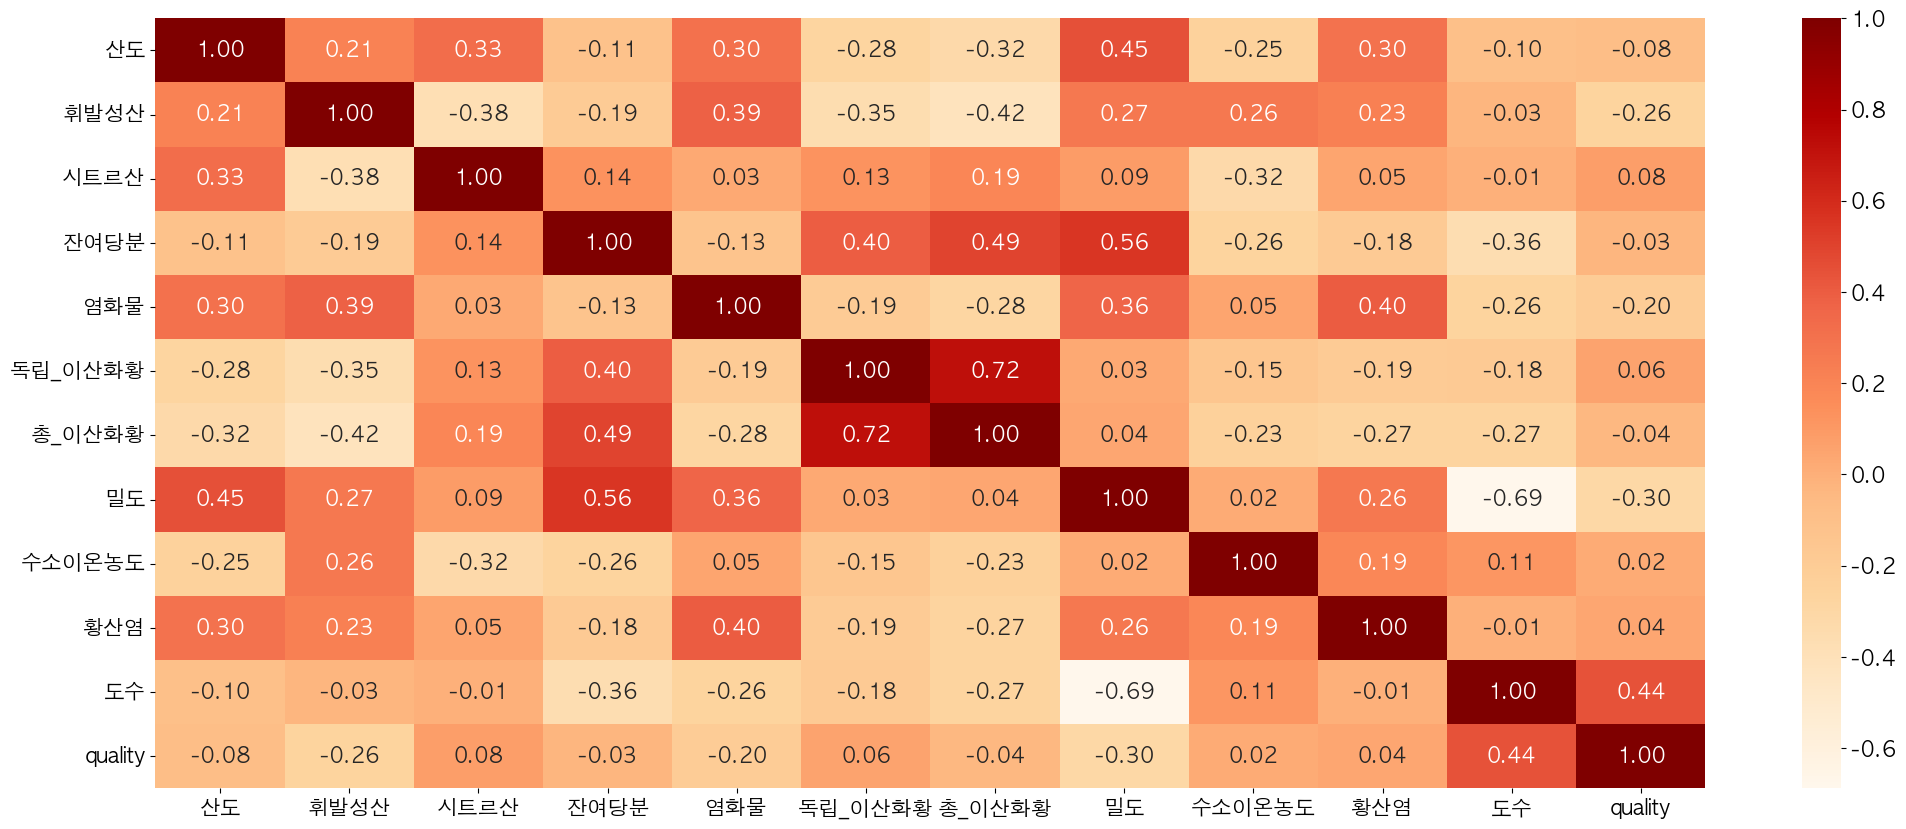

In [16]:
corr_ = train.iloc[:,1:].corr(numeric_only=True)

plt.figure(figsize=(25,10))
sns.heatmap(corr_, annot=True, fmt=".2f", cmap="OrRd")

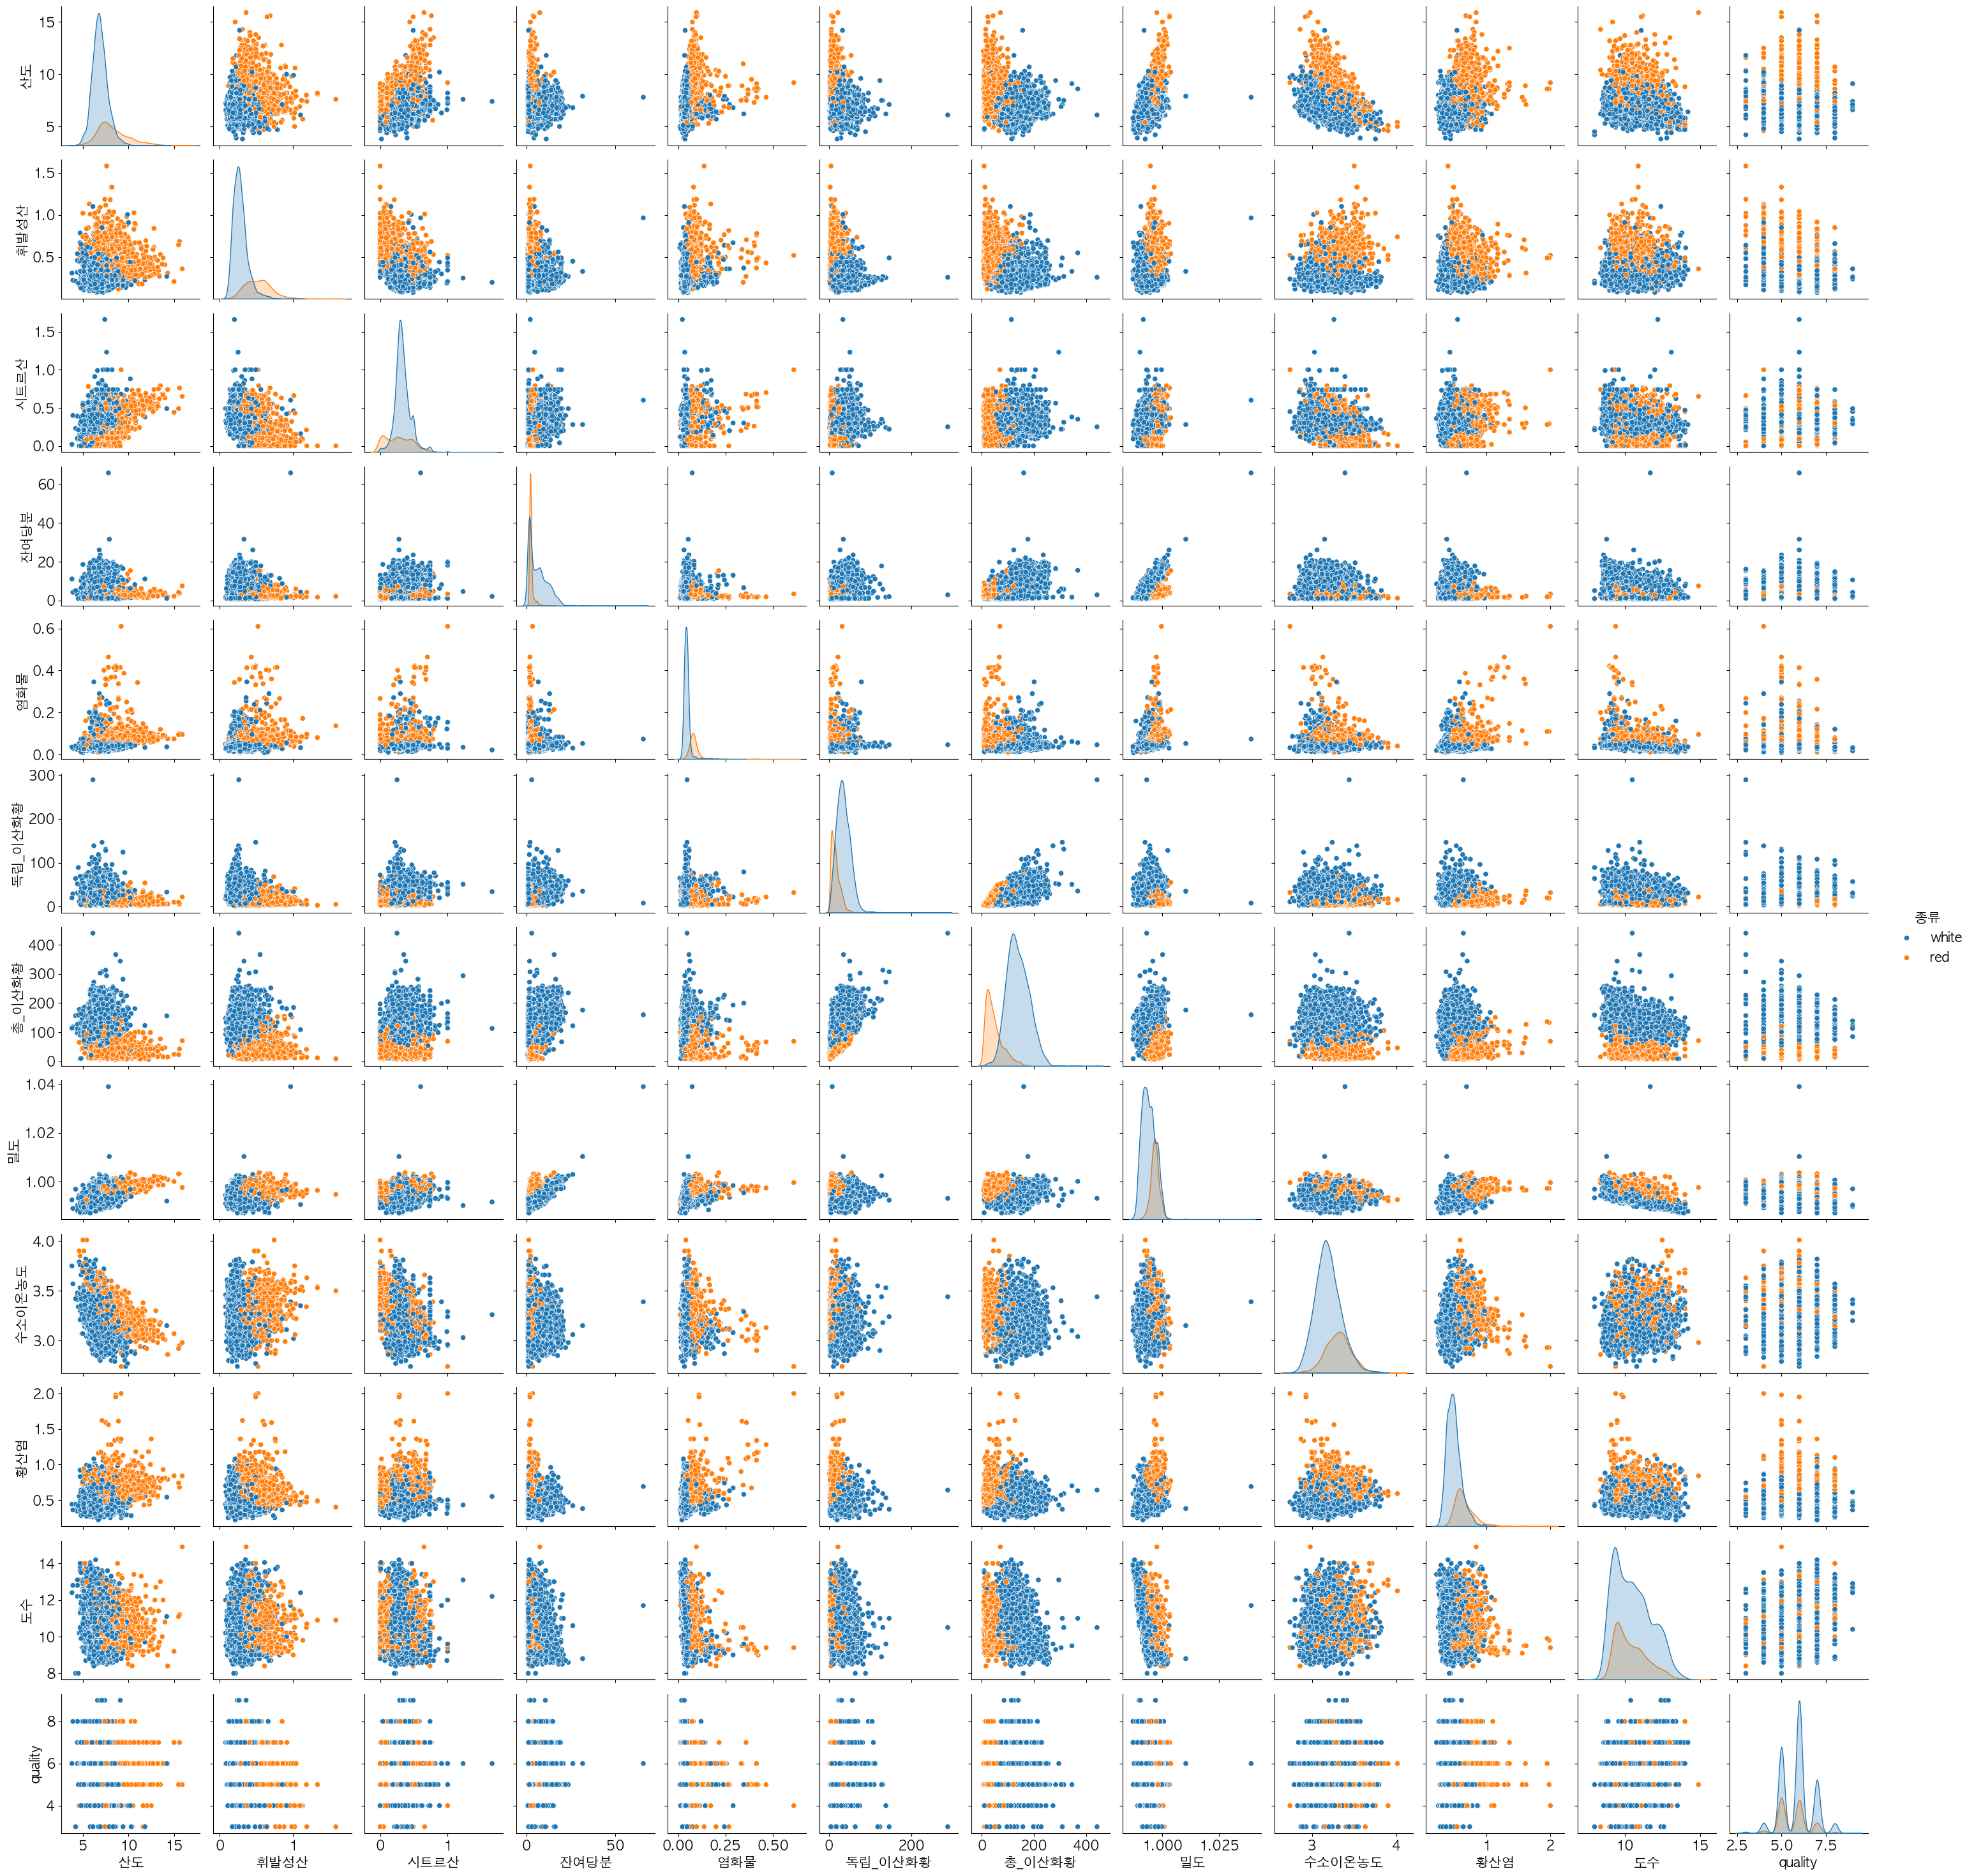

In [48]:
sns.pairplot(train[train.columns[1:]], hue="종류")

# 정리하기

- 각각의 피처들 이상치 삭제 필요
- 결측치 X
- 타겟값인 quality, 등급별로 데이터 양 차이 많음
- 특정 타겟값 제거(하면 안됨)
- white와 red의 비율 75:25